In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [27]:
# read in an image as a numpy array (preferably of size 2048x2048 px)
class ImageShuffle:
    def __init__(self, image, back_color = 'RED_A'):
        self.image_in = image                                                                                       # input image
        self.image_out = np.asarray(Image.open('images/background/im_backfold_1024.png').convert('RGB')).copy()     # import background as output image template
        self.image_back = np.asarray(Image.open(f'images/background/im_image_back_1024_{back_color}.png').convert('RGB'))   # import backside of the final fold
        self.image_width = len(self.image_in)                                                                       # width of the image (should be a squared multiple of 4)
        self.square_width = int(self.image_width / 4 + 0.1)                                                         # width of each quadrant


        # build image back segments to place


    # show segmented image
    def show_segmented(self, width = 4):
        image_segmented = self.image_in.copy()                                                                      # copy the original image
        # add segmentation lines to segmented image
        for i in range(4):
            for a in range(2*width):
                image_segmented[i*self.square_width-width+a] = 255*np.ones_like((1, self.image_width, 3))
                image_segmented[:,i*self.square_width-width+a] = 255*np.ones_like((self.image_width, 1, 3))
        img = Image.fromarray(image_segmented)
        return img


    # show front of big output image
    def show_out(self, title = "output_image"):
        img = Image.fromarray(self.image_out)
        img.save(f'images/{title}.png')
        print(f"Image saved as \'{title}.png\'.")
        return img


    # returns an image triangle of matrix position (m, n) and orientation ('TL' or 'DL' or 'DR' or 'TR') and returns it as a 'TL' triangle added to a squared 0-array
    def get_triangle(self, m, n, orientation, image_back = False):
        # define square to select pixels from (front or back) 
        if image_back:
            array_in = self.image_back[m*self.square_width:(m+1)*self.square_width, n*self.square_width:(n+1)*self.square_width]
        else:
            array_in = self.image_in[m*self.square_width:(m+1)*self.square_width, n*self.square_width:(n+1)*self.square_width]
        array_out = np.zeros((self.square_width, self.square_width, 3), dtype = np.uint8)
        # fill output array according to orientation
        for i in range(self.square_width):
            for j in range(i+1):
                # input array has rectangle at top-left 'TL' corner
                if orientation == 'TL':
                    array_out[j,self.square_width-1-i] = array_in[j,self.square_width-1-i]
                # input array has rectangle at down-left 'DL' corner
                elif orientation == 'DL':
                    array_out[j,self.square_width-1-i] = array_in[i,j]
                # input array has rectangle at down-right 'DR' corner
                elif orientation == 'DR':
                    array_out[j,self.square_width-1-i] = array_in[self.square_width-1-j,i]
                # input array has rectangle at top-right 'TR' corner
                elif orientation == 'TR':
                    array_out[j,self.square_width-1-i] = array_in[self.square_width-1-i,self.square_width-1-j]
        return array_out


    # adds (!) a triangle to the output image at matrix position (m, n) and orientation ('TL' or 'DL' or 'DR' or 'TR')
    def insert_triangle(self, triangle_in, m, n, orientation):
        # defines matrix square of output image to insert triangle in
        image_out_matrix = self.image_out[m*self.square_width:(m+1)*self.square_width, n*self.square_width:(n+1)*self.square_width]
        # fill temp array according to orientation
        for i in range(self.square_width):
            for j in range(i+1):
                # input array has rectangle at top-left 'TL' corner
                if orientation == 'TL':
                    image_out_matrix[j,self.square_width-1-i] = triangle_in[j,self.square_width-1-i]
                # input array has rectangle at down-left 'DL' corner
                elif orientation == 'DL':
                    image_out_matrix[i,j] = triangle_in[j,self.square_width-1-i]
                # input array has rectangle at down-right 'DR' corner
                elif orientation == 'DR':
                    image_out_matrix[self.square_width-1-j,i] = triangle_in[j,self.square_width-1-i]
                # input array has rectangle at top-right 'TR' corner
                elif orientation == 'TR':
                    image_out_matrix[self.square_width-1-i,self.square_width-1-j] = triangle_in[j,self.square_width-1-i]
    

    # takes a dataframe of shuffles and applies them
    def shuffle_image(self, shuffle_dataframe):
        # input triangle properties
        backside = shuffle_dataframe['back']
        m_in = shuffle_dataframe['m_in']
        n_in = shuffle_dataframe['n_in']
        orientation_in = shuffle_dataframe['o_in']
        # output triangle properties
        m_out = shuffle_dataframe['m_out']
        n_out = shuffle_dataframe['n_out']
        orientation_out = shuffle_dataframe['o_out']
        # iterate through all shuffles and get triangle and insert it
        for i in range(len(shuffle_dataframe)):
            shuffle_triangle = self.get_triangle(m_in.iloc[i], n_in.iloc[i], orientation_in.iloc[i], backside.iloc[i])
            self.insert_triangle(shuffle_triangle, m_out.iloc[i], n_out.iloc[i], orientation_out.iloc[i])

In [32]:
# read in images as array and initializing shuffle classes
image_didaktik = Image.open('images/motives/AG_Didaktik.png')
image_didaktik_array = np.asarray(image_didaktik)
didaktik_shuffle = ImageShuffle(image_didaktik_array)

image_nhk = Image.open('images/motives/NHK.png')
image_nhk_array = np.asarray(image_nhk)
nhk_shuffle = ImageShuffle(image_nhk_array, 'BLUE_A')

image_brockendrache = Image.open('images/motives/Brocken_Drache.png').convert('RGB')
image_brockendrache_array = np.asarray(image_brockendrache)
brockendrache_shuffle = ImageShuffle(image_brockendrache_array)

image_fujimoto = Image.open('images/motives/Fujimoto_Tower.png').convert('RGB')
image_fujimoto_array = np.asarray(image_fujimoto)
fujimoto_shuffle = ImageShuffle(image_fujimoto_array, 'TEAL_A')


# read in shuffles as panda dataframe
F3_53_dataframe = pd.read_csv('folds/F3_53.csv', skipinitialspace = True)
F3_57_dataframe = pd.read_csv('folds/F3_57.csv', skipinitialspace = True)


# show segmented image
# brockendrache_shuffle.show_segmented()

Image saved as 'fujimoto.png'.


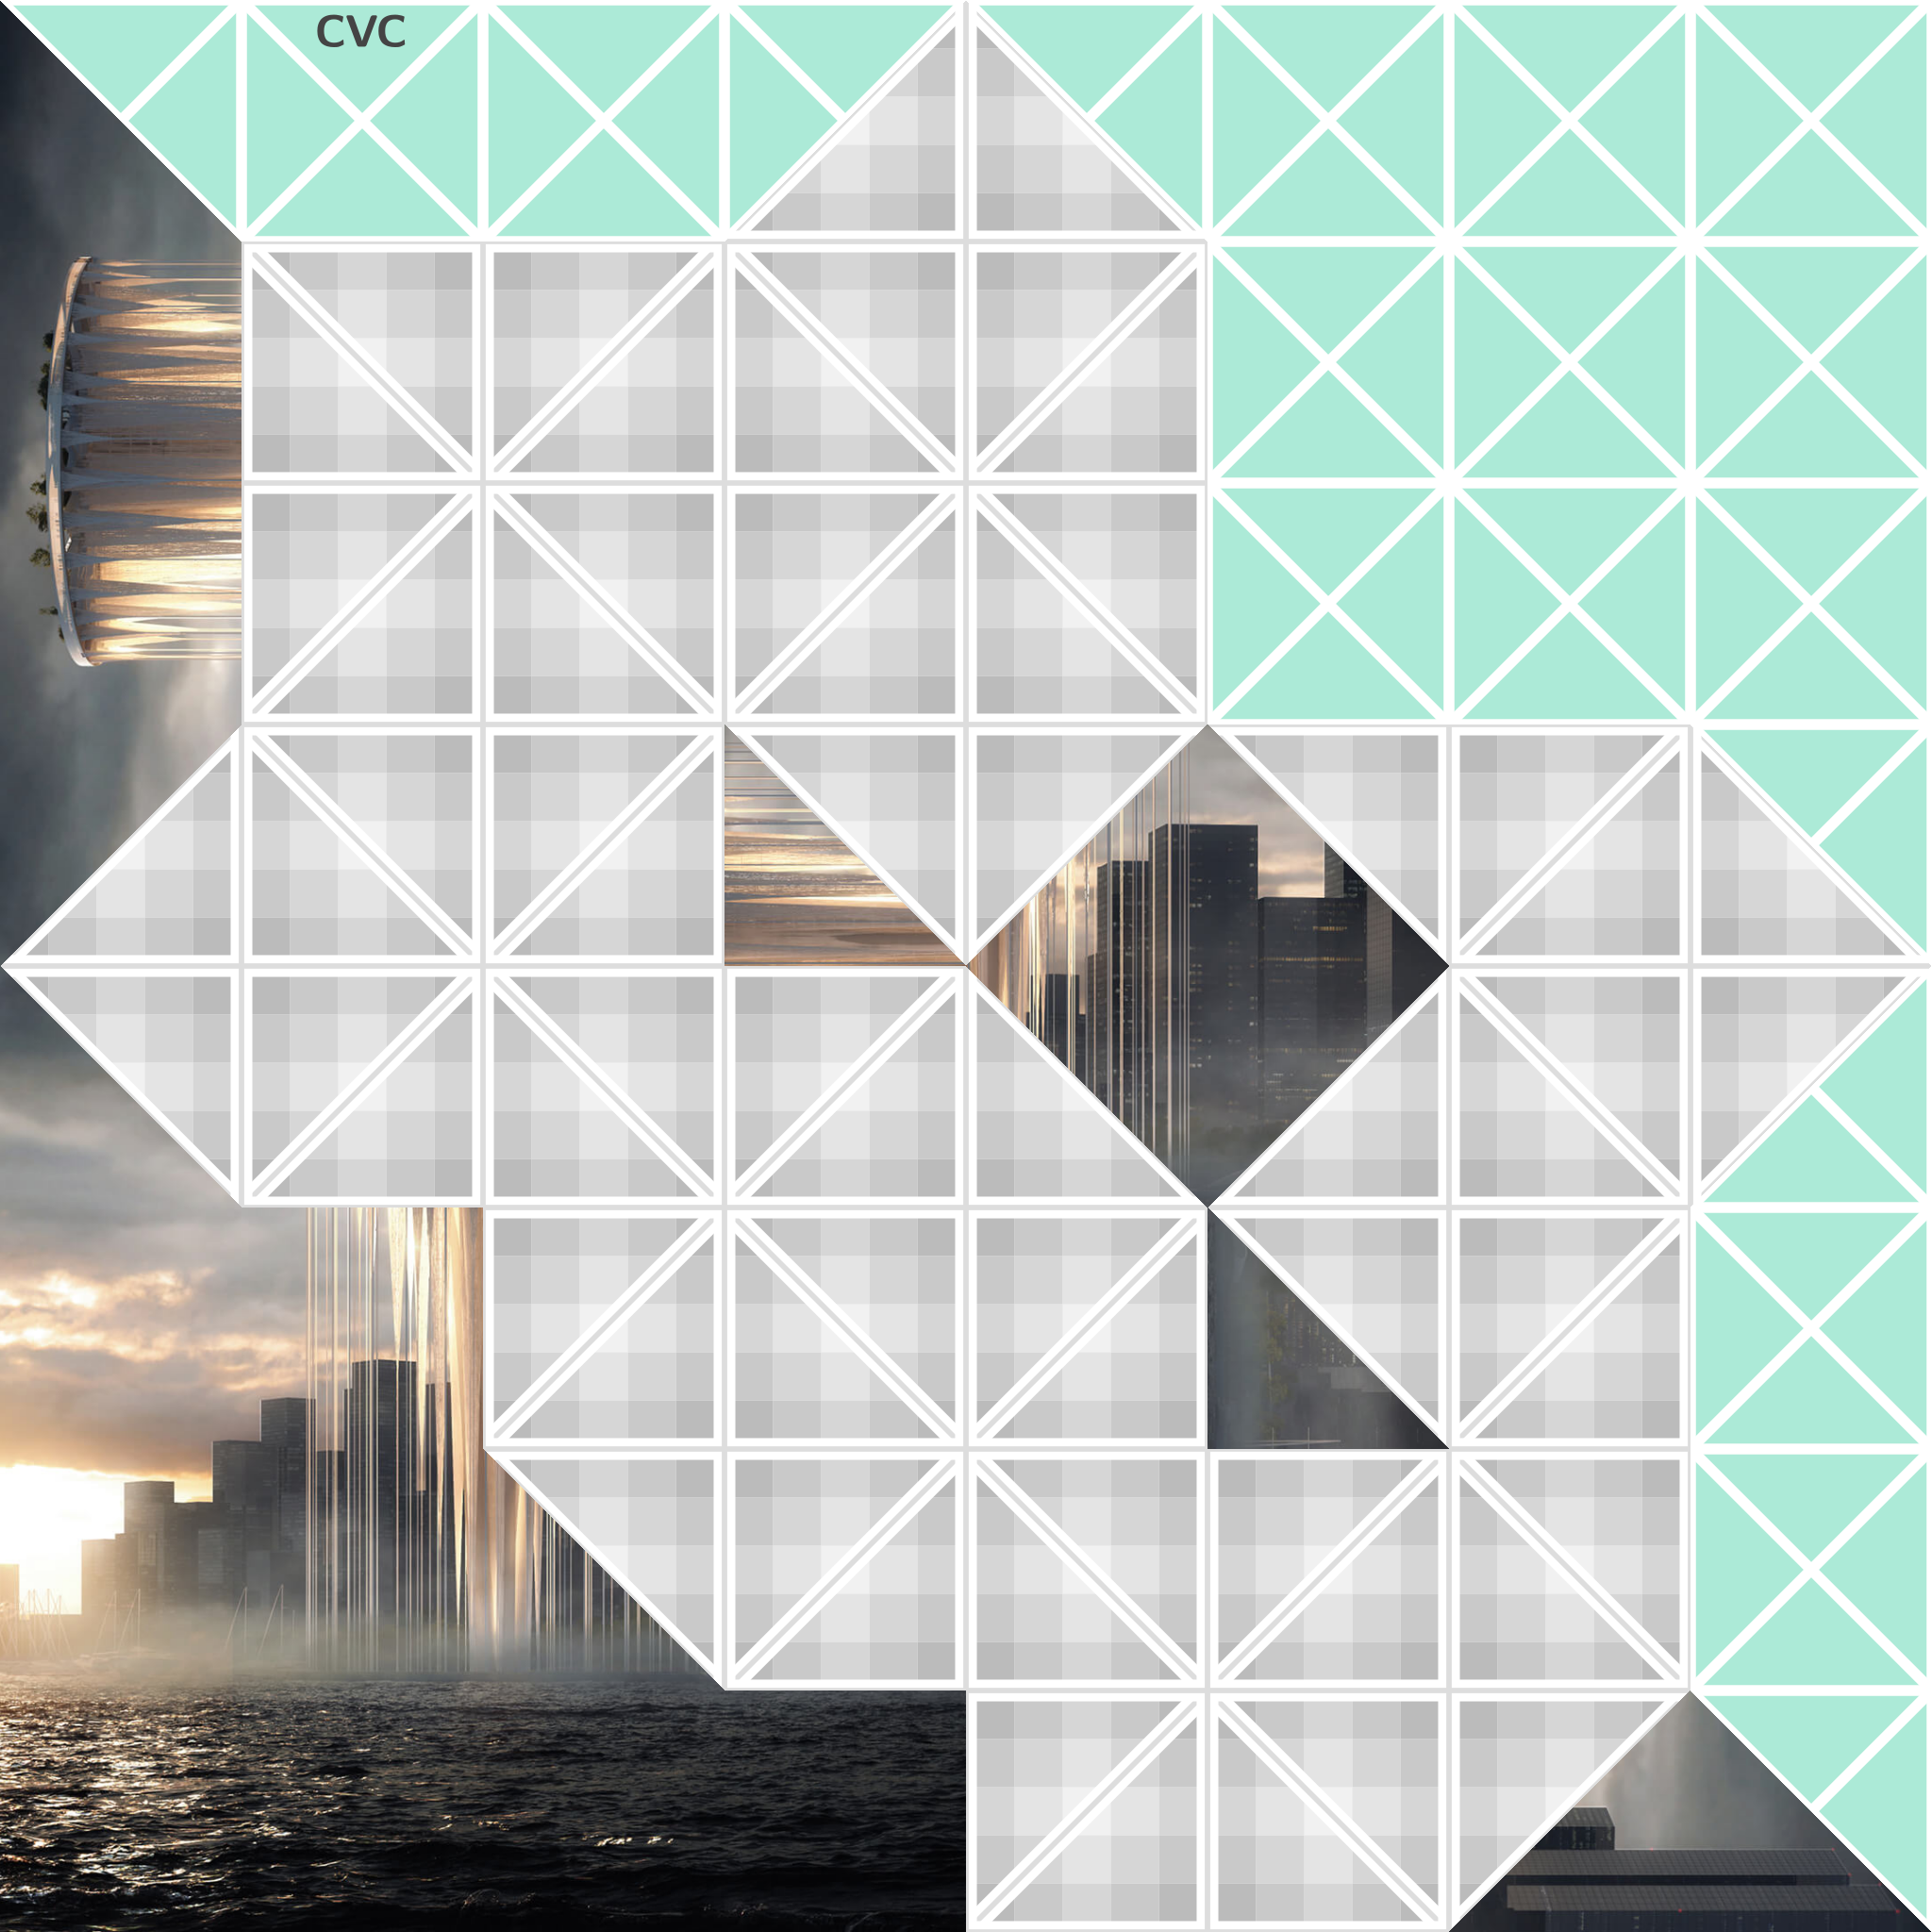

In [33]:
# brockendrache_shuffle.shuffle_image(F3_57_dataframe)
# brockendrache_shuffle.show_out()

# nhk_shuffle.shuffle_image(F3_57_dataframe)
# nhk_shuffle.show_out('nhk')

fujimoto_shuffle.shuffle_image(F3_57_dataframe)
fujimoto_shuffle.show_out('fujimoto')